<a href="https://colab.research.google.com/github/Project384/JAVAASSIGNMENT/blob/main/Properties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('/content/properties.csv')

print(df.head())
print(df.info())


   index row ID                                           Molecule  \
0      0   Row0                                                  N   
1      1   Row1                            O=C(O)c1c(OC(=O)C)cccc1   
2      2   Row2                                                C#C   
3      3   Row3  P(=O)(OP(=O)(OC[C@H]1O[C@@H](n2c3ncnc(c3nc2)N)...   
4      4   Row4  S1C([C@H](C(=O)O)N2[C@H]1[C@H](NC(=O)[C@H](N)c...   

   Molecule name  Mannhold LogP Atomic Polarizabilities  Aromatic Atoms Count  \
0            H3N           1.35                3.100379                     0   
1         C9H8O4           2.01               24.382344                     6   
2           C2H2           1.68                4.853586                     0   
3  C10H16N5O13P3           0.25               55.084688                     9   
4    C16H19N3O4S           2.34               50.237067                     6   

   Aromatic Bonds Count  Element Count Bond Polarizabilities  ...  XLogP  \
0               

In [2]:
print(df.isnull().sum())
print(df.describe())

index                                     0
row ID                                    0
Molecule                                  0
Molecule name                             0
Mannhold LogP                             0
Atomic Polarizabilities                   0
Aromatic Atoms Count                      0
Aromatic Bonds Count                      0
Element Count                             0
Bond Polarizabilities                     0
Bond Count                                0
Eccentric Connectivity Index              0
Fragment Complexity                       0
VABC Volume Descriptor                    0
Hydrogen Bond Acceptors                   0
Hydrogen Bond Donors                      0
Largest Chain                             0
Largest Pi Chain                          0
Petitjean Number                          0
Rotatable Bonds Count                     0
Lipinski's Rule of Five                   0
Topological Polar Surface Area            0
Vertex adjacency information mag

In [3]:
print(df.columns.tolist())


['index', 'row ID', 'Molecule', 'Molecule name', 'Mannhold LogP', 'Atomic Polarizabilities', 'Aromatic Atoms Count', 'Aromatic Bonds Count', 'Element Count', 'Bond Polarizabilities', 'Bond Count', 'Eccentric Connectivity Index', 'Fragment Complexity', 'VABC Volume Descriptor', 'Hydrogen Bond Acceptors', 'Hydrogen Bond Donors', 'Largest Chain', 'Largest Pi Chain', 'Petitjean Number', 'Rotatable Bonds Count', "Lipinski's Rule of Five", 'Topological Polar Surface Area', 'Vertex adjacency information magnitude', 'Molecular Weight', 'XLogP', 'Zagreb Index', 'Molecular Formula', 'Formal Charge', 'Formal Charge (pos)', 'Formal Charge (neg)', 'Heavy Atoms Count', 'Molar Mass', 'SP3 Character', 'Rotatable Bonds Count (non terminal)']


In [4]:
target_column = 'XLogP'

df = df.dropna(subset=[target_column])

X = df.drop(columns=[target_column])
y = df[target_column]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (15166, 33)
Target shape: (15166,)


In [5]:
cols_to_drop = ['index', 'row ID', 'Molecule', 'Molecule name', 'Molecular Formula']
X = X.drop(columns=cols_to_drop)

In [6]:
non_numeric = X.select_dtypes(exclude=['number']).columns
if len(non_numeric) > 0:
    X = X.drop(columns=non_numeric)

In [7]:
X = X.fillna(X.mean())

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")

Training samples: 12132
Test samples: 3034


In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [10]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R2 Score: {r2:.4f}")

Mean Squared Error: 1.4356
R2 Score: 0.8767


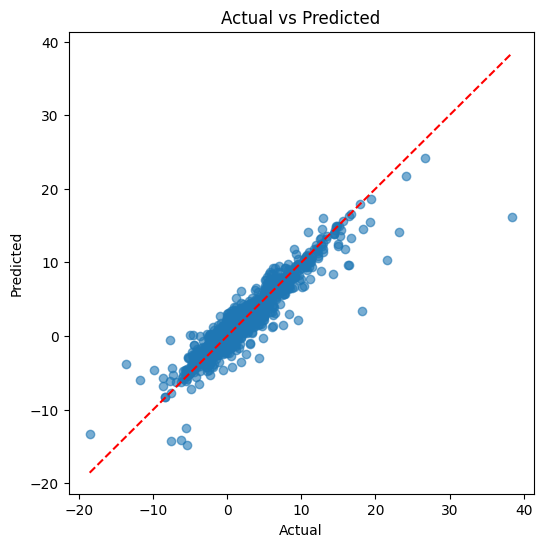

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

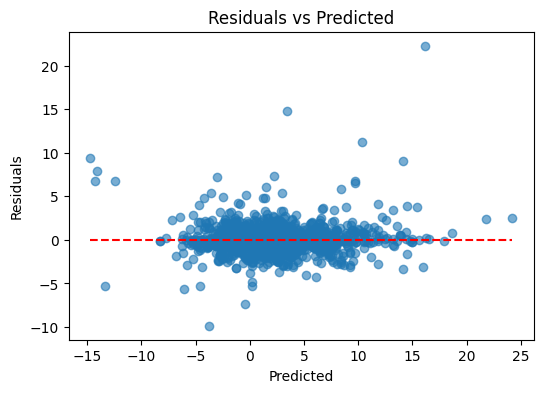

In [12]:
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.hlines(0, y_pred.min(), y_pred.max(), colors='r', linestyles='dashed')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()

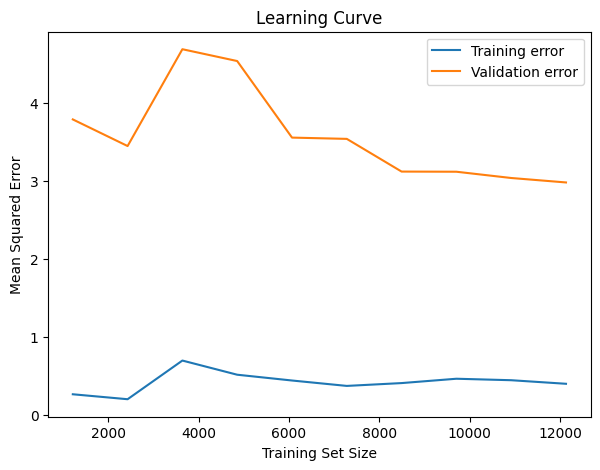

In [14]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, val_scores = learning_curve(
    RandomForestRegressor(random_state=42),
    X, y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

train_errors = -train_scores.mean(axis=1)
val_errors = -val_scores.mean(axis=1)

plt.figure(figsize=(7,5))
plt.plot(train_sizes, train_errors, label='Training error')
plt.plot(train_sizes, val_errors, label='Validation error')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.show()